<a href="https://colab.research.google.com/github/Yaswanthyarra/GAN-for-microexpression-augmentation/blob/main/GAN_CNN_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
dataset_dir = '/content/drive/My Drive/CASMEII/Final_Apex_Frames_Segregated'
augmented_dir='/content/drive/My Drive/CASMEII/Augmented_Apex_Frames'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np

import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


dataset_dir = '/content/drive/My Drive/CASMEII/Final_Apex_Frames_Segregated'

label_dict = {'happiness': 0, 'disgust': 1, 'repression': 2, 'surprise': 3, 'fear': 4, 'others': 6, 'sadness': 5}

expression_images = []
expression_labels = []

for class_name, label in label_dict.items():
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)

    for image_file in images:
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)  # Load the image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64,64))
        if label==1:
          expression_images.append(image)
          expression_labels.append(label)
        if label==6:
          expression_images.append(image)
          expression_labels.append(label)



        expression_images.append(image)
        expression_labels.append(label)


In [29]:
augmented_dir='/content/drive/My Drive/CASMEII/Augmented_Apex_Frames'
label_dict = {'happiness': 0, 'repression': 2, 'surprise': 3, 'fear': 4, 'sadness': 5}

for class_name, label in label_dict.items():
    class_dir = os.path.join(augmented_dir, class_name)
    images = os.listdir(class_dir)

    for image_file in images:
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)  # Load the image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if label==0:
          expression_images.append(image)
          expression_labels.append(label)
        if label==3:
          expression_images.append(image)
          expression_labels.append(label)
        if label==2:
          expression_images.append(image)
          expression_labels.append(label)

        expression_images.append(image)
        expression_labels.append(label)

In [30]:

# Convert lists to NumPy arrays
expression_images = np.array(expression_images)
expression_labels = np.array(expression_labels)

# Check the shape of the image data and labels
print("Expression Images Shape:", expression_images.shape)
print("Expression Labels Shape:", expression_labels.shape)
# Obtain the number of class labels
num_classes = len(np.unique(expression_labels))

# Stratified Splitting of data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(expression_images, expression_labels, test_size=0.2, stratify=expression_labels, random_state=42)

Expression Images Shape: (896, 64, 64)
Expression Labels Shape: (896,)


In [23]:
import os

folder_path = "/content/drive/My Drive/CASMEII/Final_Apex_Frames_Segregated"

# Get the list of subdirectories
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Print subfolder names and the number of files in each subfolder
for subfolder in subfolders:
    folder_name = os.path.basename(subfolder)
    files = [f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))]
    num_files = len(files)
    print(f"{folder_name} ::{num_files}")


disgust ::63
others ::99
surprise ::25
sadness ::7
happiness ::32
repression ::27
fear ::2


In [12]:
import os

folder_path = "/content/drive/My Drive/CASMEII/Augmented_Apex_Frames"

# Get the list of subdirectories
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Print subfolder names and the number of files in each subfolder
for subfolder in subfolders:
    folder_name = os.path.basename(subfolder)
    files = [f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))]
    num_files = len(files)
    print(f"{folder_name} ::{num_files}")

fear ::60
happiness ::64
repression ::64
sadness ::63
surprise ::50


In [31]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.29),
    Dense(num_classes, activation='softmax')
])

# Define the optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.0006)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the model
history = model.fit(train_images, train_labels, epochs=52, batch_size=17, validation_data=(test_images, test_labels))

model.save('/content/drive/My Drive/GAN_Models/GoogleNet_Microexp.h5')
model = tf.keras.models.load_model('/content/drive/My Drive/GAN_Models/GoogleNet_Microexp.h5')


Epoch 1/52
43/43 [==============================] - 6s 120ms/step - loss: 4.9598 - accuracy: 0.2947 - val_loss: 1.4770 - val_accuracy: 0.3889
Epoch 2/52
43/43 [==============================] - 8s 180ms/step - loss: 1.3022 - accuracy: 0.5237 - val_loss: 0.9722 - val_accuracy: 0.6444
Epoch 3/52
43/43 [==============================] - 5s 105ms/step - loss: 0.9309 - accuracy: 0.6858 - val_loss: 0.7731 - val_accuracy: 0.7056
Epoch 4/52
43/43 [==============================] - 5s 106ms/step - loss: 0.7476 - accuracy: 0.7458 - val_loss: 0.5005 - val_accuracy: 0.8056
Epoch 5/52
43/43 [==============================] - 8s 177ms/step - loss: 0.6631 - accuracy: 0.7737 - val_loss: 0.4463 - val_accuracy: 0.8222
Epoch 6/52
43/43 [==============================] - 5s 112ms/step - loss: 0.6052 - accuracy: 0.7835 - val_loss: 0.4902 - val_accuracy: 0.8222
Epoch 7/52
43/43 [==============================] - 5s 106ms/step - loss: 0.6153 - accuracy: 0.7723 - val_loss: 0.4320 - val_accuracy: 0.8333
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


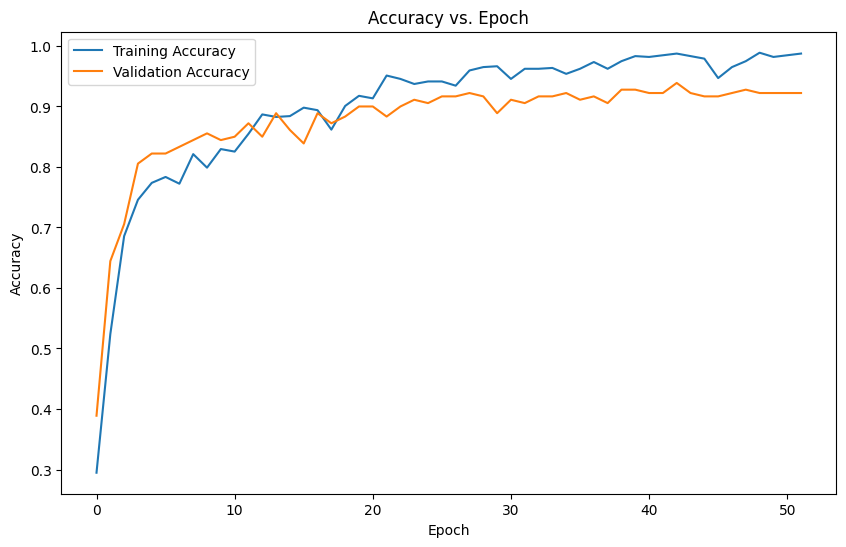

6/6 [==============================] - 0s 48ms/step


<Figure size 1000x1000 with 0 Axes>

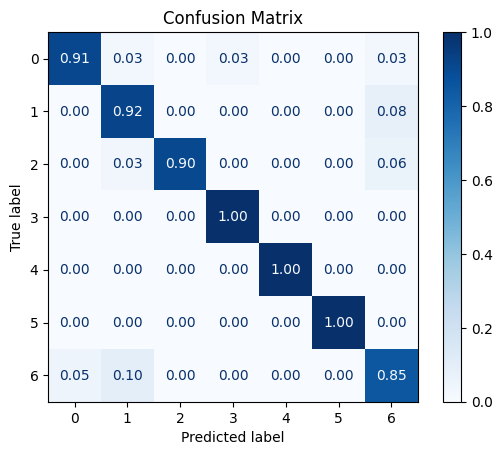

In [33]:

# Plot accuracy vs. epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate confusion matrix
predicted_probabilities = model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Plot confusion matrix
cm = confusion_matrix(test_labels, predicted_labels, normalize='true')  # No need for np.argmax here
classes = [str(i) for i in range(num_classes)]  # Replace with actual class labels if available
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.metrics import classification_report
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)



# Calculate precision, recall, F1-score, and support
report = classification_report(test_labels, predicted_labels)
print(report)

6/6 [==============================] - 1s 82ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.79      0.92      0.85        25
           2       1.00      0.90      0.95        31
           3       0.96      1.00      0.98        25
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        14
           6       0.87      0.85      0.86        40

    accuracy                           0.92       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.93      0.92      0.92       180



In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score

# Get true labels (assuming test_labels is one-hot encoded)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
uar = balanced_accuracy_score(test_labels, predicted_labels)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'UAR: {uar:.4f}')


6/6 [==============================] - 0s 77ms/step
Accuracy: 0.9222
Precision: 0.9260
Recall: 0.9222
F1-score: 0.9229
UAR: 0.9399
